## Helper Functions

In [14]:
def drop_na(merged_df):
    merged_df = merged_df.dropna()
    merged_df.reset_index(drop=True, inplace=True)
    return merged_df

In [16]:
def apply_lag_features(merged_df):
    # add previous one-day values
    merged_df["prev1_open"] = merged_df["Open"].shift(1)
    merged_df["prev1_close"] = merged_df["Close"].shift(1)

    # add previous two-day values
    merged_df["prev2_open"] = merged_df["Open"].shift(2)
    merged_df["prev2_close"] = merged_df["Close"].shift(2)

    # previous 1 day sentiment
    merged_df["prev1_sentiment_compound"] = merged_df["sentiment_compound"].shift(1)

    # previous 2 day sentiment
    merged_df["prev2_sentiment_compound"] = merged_df["sentiment_compound"].shift(2)

    # previous 1 day volume
    merged_df["prev1_volume"] = merged_df["Volume"].shift(1)

    # previous 2 day volume
    merged_df["prev2_volume"] = merged_df["Volume"].shift(2)

    
    return merged_df

NameError: name 'xticks' is not defined

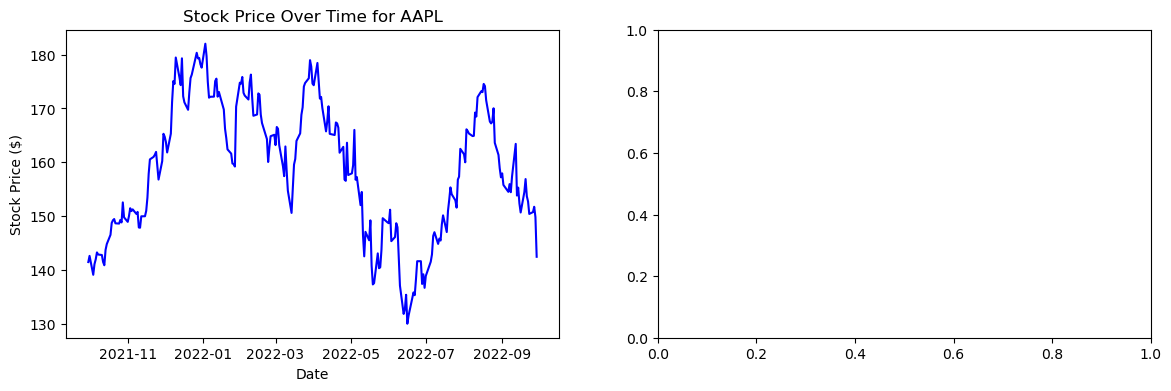

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stocks = ['AAPL', 'GOOG', 'INTC', 'META', 'MSFT']

for stock in stocks:
    curr_finance_df = pd.read_csv(f'{stock} Data/{stock}_finance_data.csv')
    curr_sentiment_df = pd.read_csv(f'{stock} Data/{stock}_avg_sentiment_data.csv')

    curr_finance_df['Date'] = pd.to_datetime(curr_finance_df['Date'])
    curr_sentiment_df['Date'] = pd.to_datetime(curr_sentiment_df['Date'])

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4), sharey=False)

    # finance plot (left)
    ax1.plot(curr_finance_df['Date'], curr_finance_df['Close'], linestyle='-', color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)")
    ax1.set_title(f"Stock Price Over Time for {stock}")
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([d.strftime('%Y-%m-%d') for d in xticks], rotation=45)
    ax1.grid(True)

    # sentiment plot (right)
    ax2.plot(curr_sentiment_df['Date'], curr_sentiment_df['sentiment_compound'], linestyle='-', color='blue')
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Sentiment Compound")
    ax2.set_title(f"Social Media Sentiment Over Time for {stock}")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([d.strftime('%Y-%m-%d') for d in xticks], rotation=45)
    ax2.set_ylim(-1, 1)
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


### Standardized Data

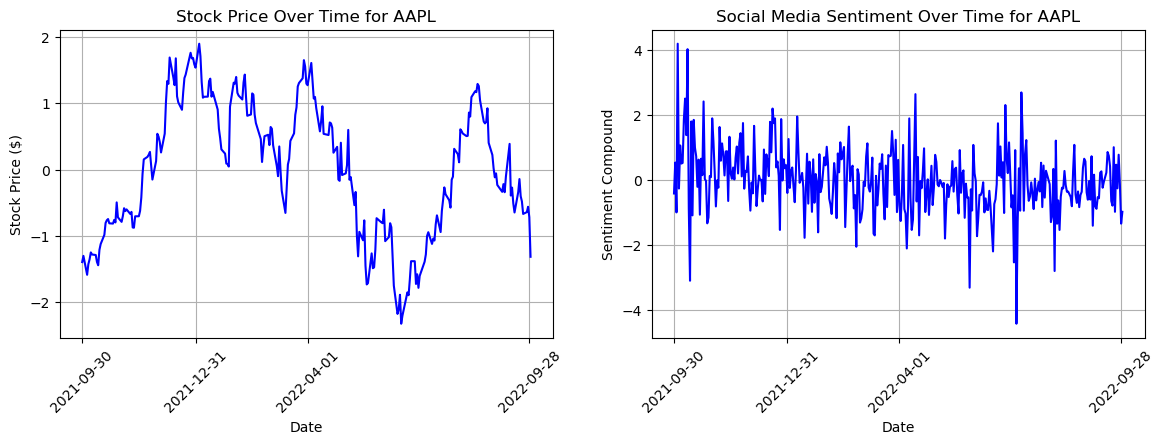

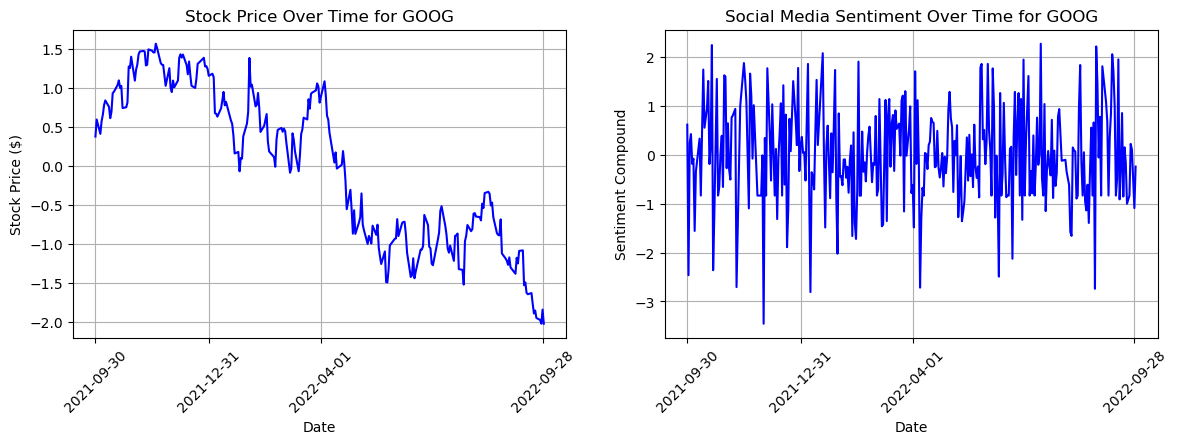

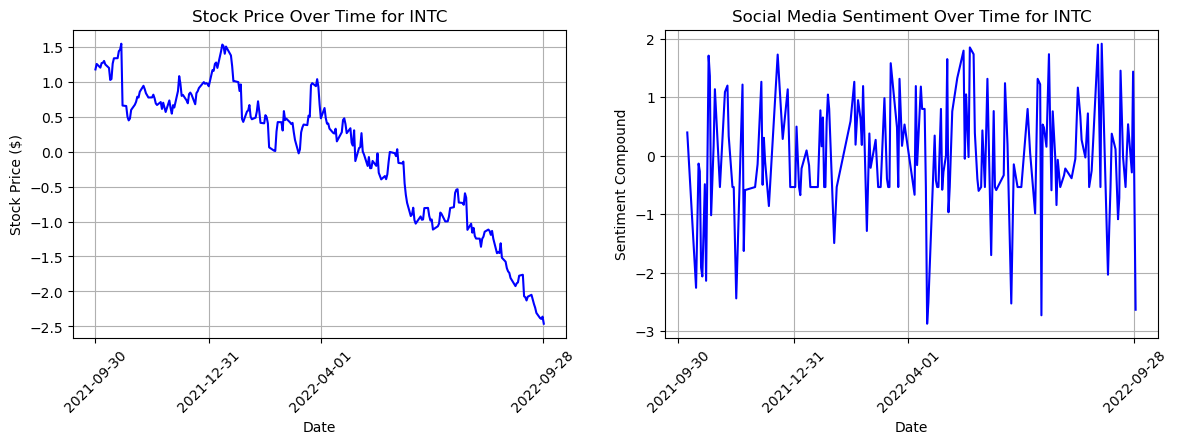

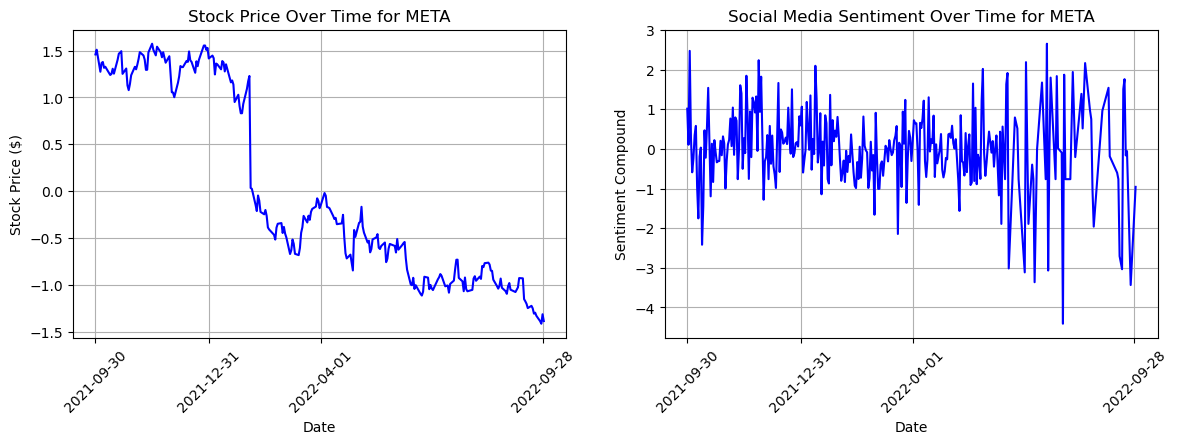

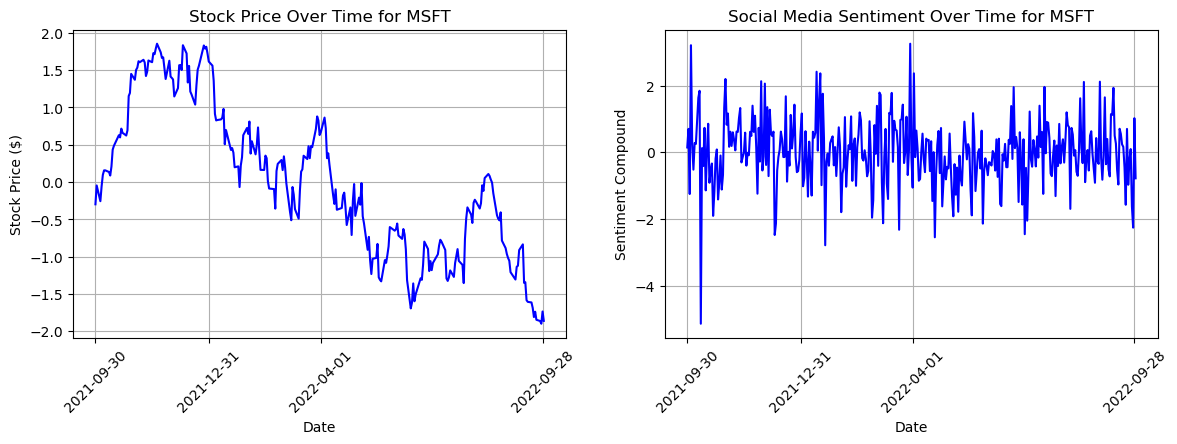

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL', 'GOOG', 'INTC', 'META', 'MSFT']

for stock in stocks:
    # load finance and sentiment data 
    curr_finance_df = pd.read_csv(f'{stock} Data/{stock}_finance_data.csv')
    curr_sentiment_df = pd.read_csv(f'{stock} Data/{stock}_avg_sentiment_data.csv')
    
    curr_finance_df['Date'] = pd.to_datetime(curr_finance_df['Date'])
    finance_data = curr_finance_df['Close'].values.reshape(-1, 1)

    curr_sentiment_df['Date'] = pd.to_datetime(curr_sentiment_df['Date'])
    sentiment_data = curr_sentiment_df['sentiment_compound'].values.reshape(-1, 1)

    # standardize data
    standard_scaler = StandardScaler()
    finance_standard = standard_scaler.fit_transform(finance_data)
    sentiment_standard = standard_scaler.fit_transform(sentiment_data)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4), sharey=False)

    # finance plot (left)
    ax1.plot(curr_finance_df['Date'], finance_standard, linestyle='-', color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)")
    ax1.set_title(f"Stock Price Over Time for {stock}")
    xticks = pd.to_datetime(['2021-09-30', '2021-12-31', '2022-04-01', '2022-09-28'])
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
    ax1.grid(True)

    # sentiment plot (right)
    ax2.plot(curr_sentiment_df['Date'], sentiment_standard, linestyle='-', color='blue')
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Sentiment Compound")
    ax2.set_title(f"Social Media Sentiment Over Time for {stock}")
    xticks = pd.to_datetime(['2021-09-30', '2021-12-31', '2022-04-01', '2022-09-28'])
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticks.strftime('%Y-%m-%d'), rotation=45)
    ax2.grid(True)


### Looking at distribution of data

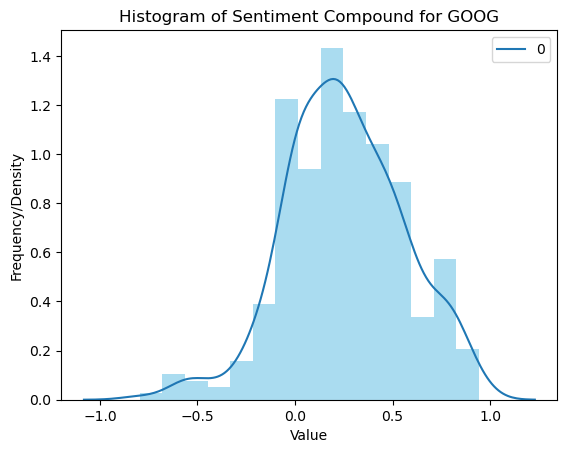

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

curr_finance_df = pd.read_csv(f'./GOOG Data/GOOG_avg_sentiment_data.csv')
data= curr_finance_df['sentiment_compound'].values.reshape(-1, 1)
plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
sns.kdeplot(data, color='red') 
plt.title('Histogram of Sentiment Compound for GOOG')
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.show()

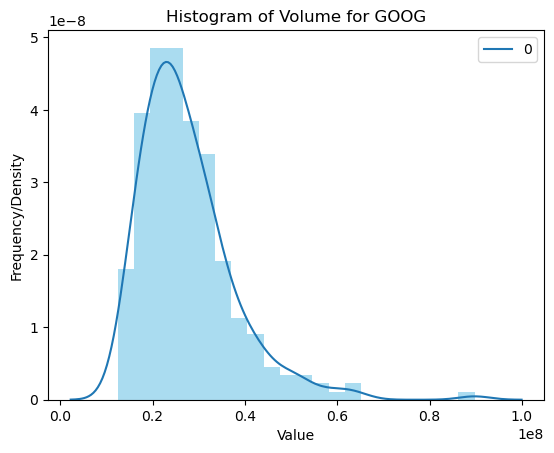

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

curr_finance_df = pd.read_csv(f'./GOOG Data/GOOG_finance_data.csv')
data= curr_finance_df['Volume'].values.reshape(-1, 1)
plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
sns.kdeplot(data, color='red') 
plt.title('Histogram of Volume for GOOG')
plt.xlabel('Value')
plt.ylabel('Frequency/Density')
plt.show()

## Correlation Matrix Plot

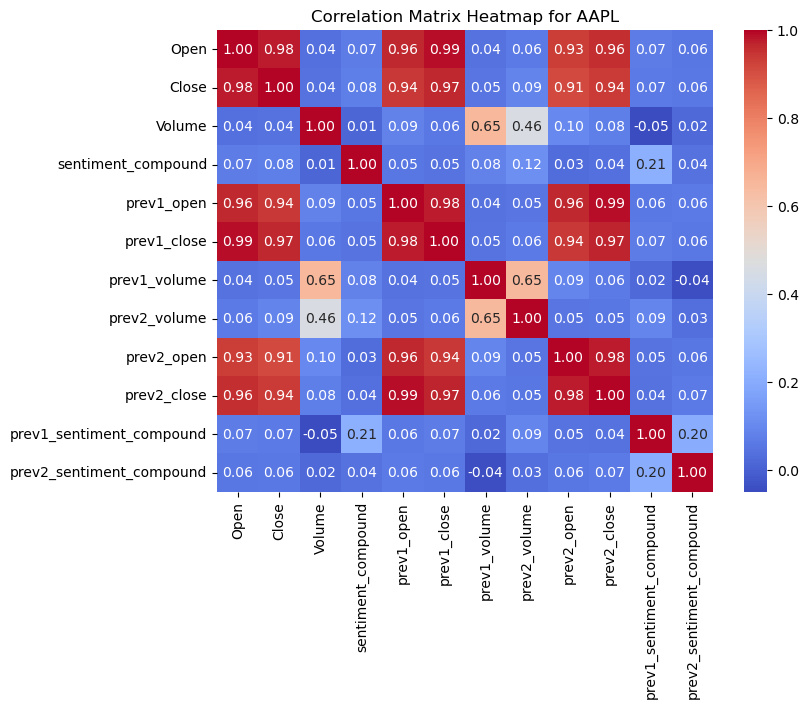

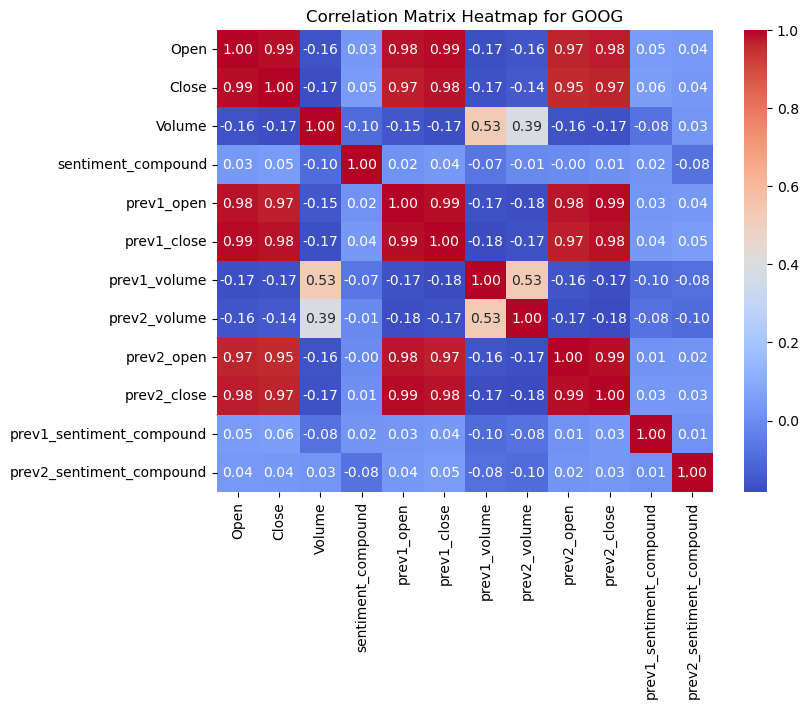

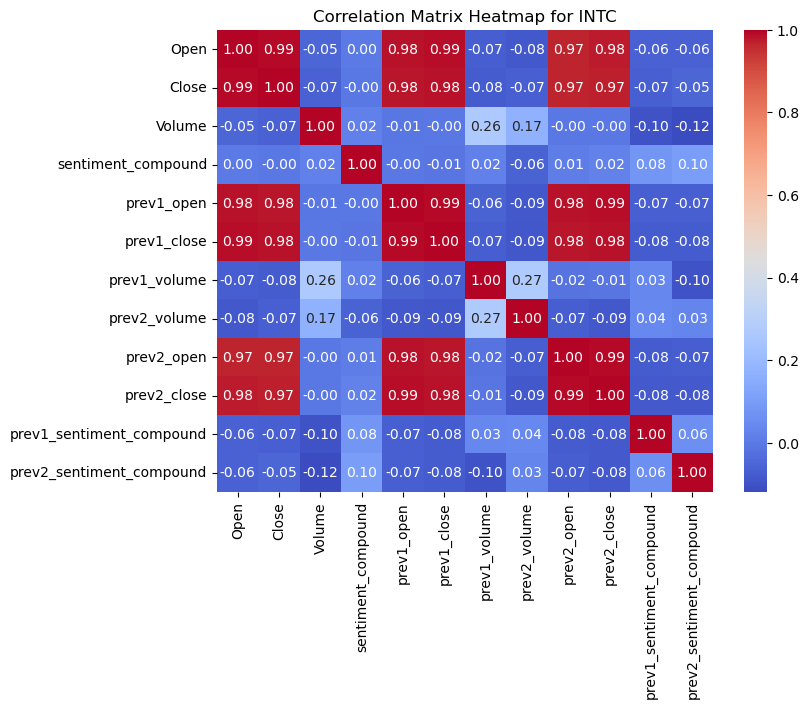

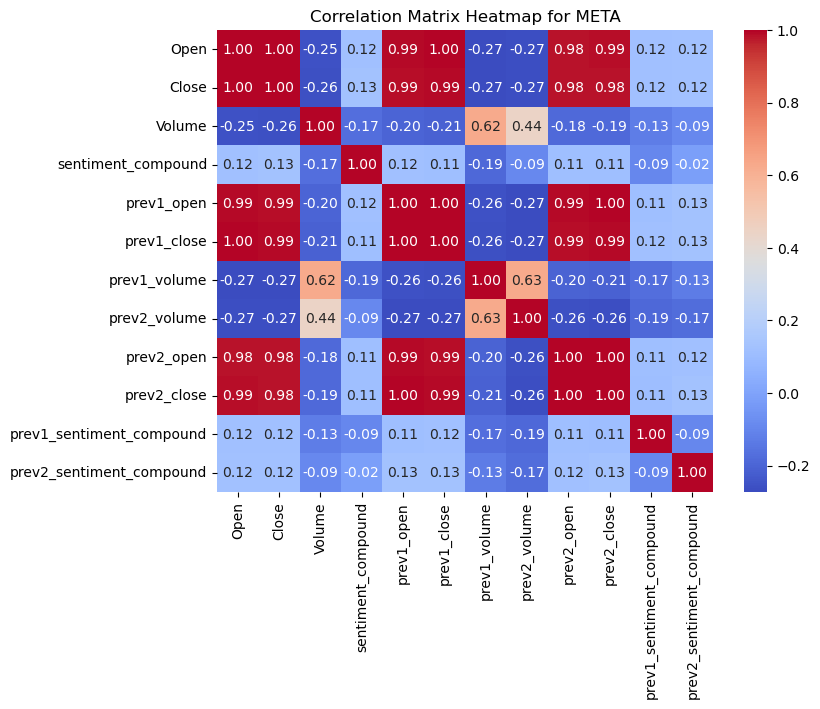

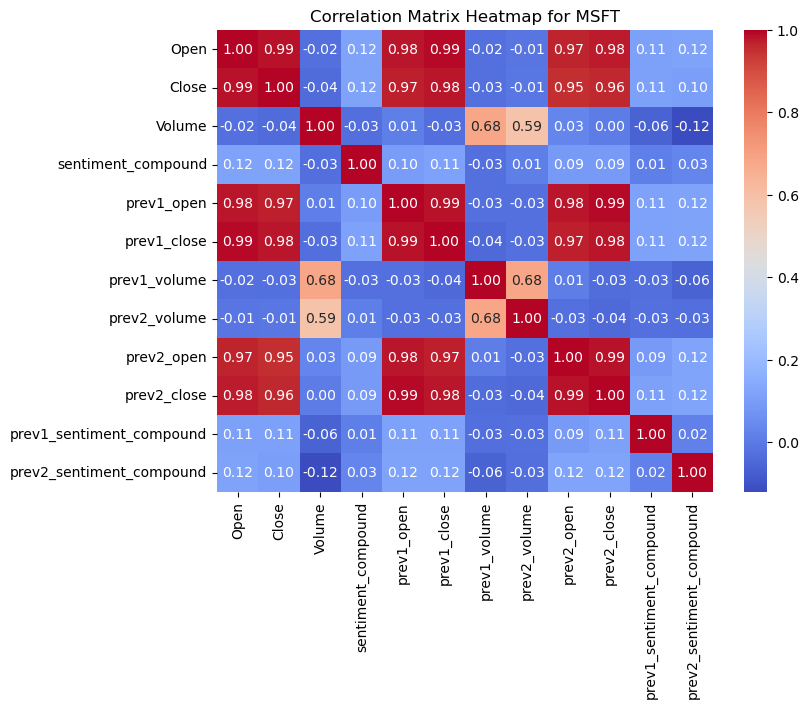

In [18]:
stocks = ['AAPL', 'GOOG', 'INTC', 'META', 'MSFT']

for stock in stocks:
    # load finance and sentiment data 
    stock_finance_df = pd.read_csv(f'./{stock} Data/{stock}_finance_data.csv')
    stock_sentiment_df = pd.read_csv(f'./{stock} Data/{stock}_avg_sentiment_data.csv')
    merged_stock_df = pd.merge(stock_finance_df, stock_sentiment_df, on='Date', how='inner')
    merged_stock_df['Date'] = pd.to_datetime(merged_stock_df['Date'])
    merged_stock_df = apply_lag_features(merged_stock_df)
    merged_stock_df = drop_na(merged_stock_df)
    features = [
        'Open', 'Close', 'Volume', 'sentiment_compound', 
        'prev1_open', 'prev1_close','prev1_volume',
        'prev2_volume', 'prev2_open', 'prev2_close', 
        'prev1_sentiment_compound', 'prev2_sentiment_compound'
    ]
    merged_stock_df = merged_stock_df[features]
    correlation_matrix = merged_stock_df.corr()

    # Create a heatmap
    plt.figure(figsize=(8, 6)) # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap for ' + stock)
    plt.show()